In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Make plots display nicely
sns.set(style="whitegrid")

print("Setup complete!")


Setup complete!


In [2]:
import pandas as pd

# Load your Titanic dataset
df = pd.read_csv("Titanic Machine Learning from Disaster.csv")

# Quick preview
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()

Shape: (891, 12)
Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill Age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked with mode (most common value)
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop Cabin safely (ignore if already removed)
df.drop(columns=["Cabin"], errors="ignore", inplace=True)

# Confirm all missing values handled
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

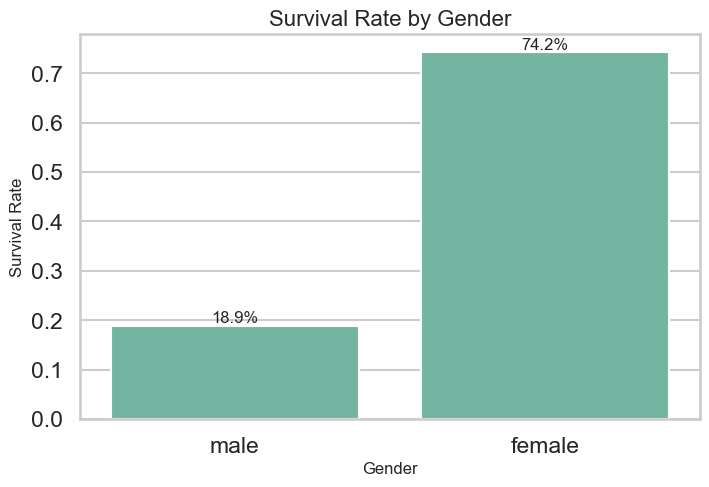

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Set2")
sns.set_context("talk")

plt.figure(figsize=(8,5))
ax = sns.barplot(x="Sex", y="Survived", data=df, errorbar=None)

plt.title("Survival Rate by Gender", fontsize=16)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Gender", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


**Insight:** Women had a much higher survival rate (~75% compared to ~19% for men). This shows gender played a strong role in survival chances.



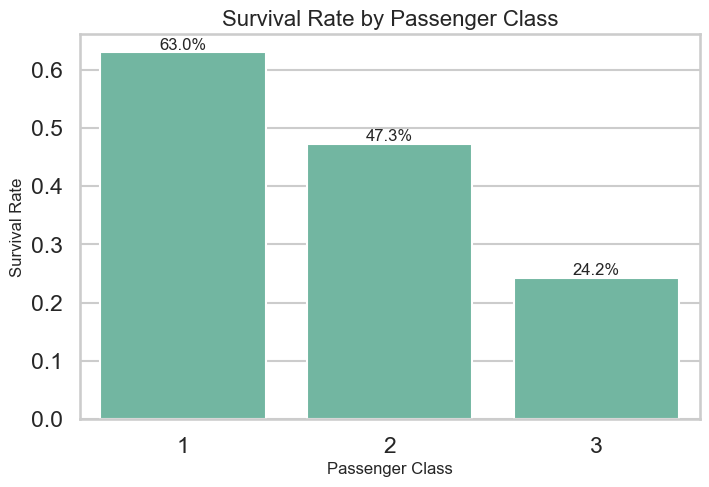

In [7]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Pclass", y="Survived", data=df, errorbar=None)

plt.title("Survival Rate by Passenger Class", fontsize=16)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Passenger Class", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


**Insight:** 1st-class passengers had the highest survival rates, while 3rd-class passengers had the lowest. Higher socio-economic status likely improved survival chances.


In [8]:
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x="AgeGroup",
    y="Survived",
    data=df,
    order=["Child","Teen","Adult","Middle-Aged","Senior"],
    errorbar=None
)

plt.title("Survival Rate by Age Group", fontsize=16)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Age Group", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


ValueError: Could not interpret value `AgeGroup` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

**Insight:** Children and teens had better survival chances than middle-aged and older adults. This suggests that age influenced survival priority during evacuation.


In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="FamilySize", y="Survived", data=df, errorbar=None)

plt.title("Survival Rate by Family Size", fontsize=16)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Family Size", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


**Insight:** Medium-sized families (2–4 members) had higher survival rates compared to individuals or very large families. Traveling in moderately-sized groups improved survival chances.


In [ ]:
plt.figure(figsize=(8,5))
ax = sns.barplot(x="Embarked", y="Survived", data=df, errorbar=None)

plt.title("Survival Rate by Port of Embarkation", fontsize=16)
plt.ylabel("Survival Rate", fontsize=12)
plt.xlabel("Port of Embarkation", fontsize=12)

for p in ax.patches:
    ax.annotate(f"{p.get_height()*100:.1f}%", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.show()


**Insight:** Survival rates varied slightly by port. Passengers from some ports survived more than others, indicating potential differences in onboard conditions or rescue priorities.


In [ ]:
# First, select only the numeric columns from your DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Then create the heatmap with only numeric data
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# Note: If you need to include specific columns that are currently strings but represent
# numerical data, you'll need to convert them first:
# df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce')

**Insight:** 
- Fare and Pclass show noticeable correlation with survival.
- Other numeric variables (like Age, SibSp, Parch) have weaker correlations.
- This heatmap adds depth to the analysis by highlighting which features are most associated with survival.


**Portfolio Value:** Enhanced analysis with correlation insights. Demonstrates ability to identify key relationships between variables, going beyond basic visualizations.


**Overall Insights:**
- Women had far higher survival rates than men.
- 1st-class passengers survived more than 3rd-class.
- Children and teens had better survival chances than middle-aged men.
- Medium-sized families did better than individuals.
- Port of embarkation showed some variation.
